In [1]:
import requests
import numpy as np
import pandas as pd
import peptides as ptd

import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",999)
pd.set_option("display.max_rows",100)

%load_ext autoreload
%autoreload 2

# req & peptide 

In [ ]:
req = requests.get('https://query-api.cedar.org/epitope_search?select=structure_id,structure_description')
x = json.loads(req.text)
x[3]

In [19]:
aa = 'ELAGIGILFTV'
pep = ptd.Peptide(aa)
pep.boman(), pep.aliphatic_index(), pep.descriptors()

(-1.91,
 177.27272727272728,
 {'BLOSUM1': -0.4581818181818181,
  'BLOSUM2': -0.4800000000000001,
  'BLOSUM3': -0.06545454545454549,
  'BLOSUM4': 0.08272727272727272,
  'BLOSUM5': -0.31,
  'BLOSUM6': 0.4145454545454545,
  'BLOSUM7': 0.15636363636363637,
  'BLOSUM8': 0.08272727272727275,
  'BLOSUM9': 0.1509090909090909,
  'BLOSUM10': 0.07909090909090909,
  'PP1': -0.6281818181818181,
  'PP2': -0.3572727272727273,
  'PP3': -0.0809090909090909,
  'F1': 0.34354545454545454,
  'F2': 0.13518181818181818,
  'F3': -0.08209090909090908,
  'F4': 0.9704545454545453,
  'F5': -0.10572727272727273,
  'F6': -0.18390909090909088,
  'KF1': -0.39272727272727276,
  'KF2': -0.5590909090909091,
  'KF3': 0.26818181818181824,
  'KF4': -0.3963636363636365,
  'KF5': -0.3272727272727273,
  'KF6': -0.55,
  'KF7': 0.23454545454545456,
  'KF8': 0.4118181818181817,
  'KF9': -0.04999999999999998,
  'KF10': -0.08909090909090908,
  'MSWHIM1': -0.4754545454545455,
  'MSWHIM2': 0.44,
  'MSWHIM3': -0.4354545454545455,
  '

In [ ]:
def pep_props(aa):
    pep = ptd.Peptide(aa)
    pep_desc = {'seq', aa}
    for k,v in pep.descriptors().items():
        pep_desc[k] = v
    pep_desc['charge_7'] = pep.charge()
    pep_desc['boman'] = pep.boman()
    pep_desc['aliph_idx'] = pep.aliphatic_index()
    pep_desc['isoelec_pt'] = pep.isoelectric_point()
    pep_desc['hydrophobicity_kd'] = pep.hydrophobicity(scale='KyteDoolittle')
    

# Data Exploration

In [11]:
path = '../data/'
os.listdir(path)

['CALIS_dataset_supp1_immu.xls',
 'CALIS_dataset_supp2_epi.xls',
 'epitope_export_mhc1_TCR-MHC_220510.csv',
 'mhc_ligand_export_220510.csv',
 'PRIME_dataset.xlsx',
 'tcell_export_mhc1_220510.csv']

In [9]:
def flatten_level_columns(df:pd.DataFrame, levels=[0,1]):
    df.columns = [f'{x.lower()}_{y.lower()}' for x,y in zip(df.columns.get_level_values(levels[0]), df.columns.get_level_values(levels[1]))]
    return df 

In [12]:
df_epi = flatten_level_columns(pd.read_csv(path+'epitope_export_mhc1_TCR-MHC_220510.csv', header=[0,1])).reset_index(drop=True)
# Only get positive to MHC (i.e. binds MHC)
df_mhc = flatten_level_columns(pd.read_csv(path+'mhc_ligand_export_220510.csv', header=[0,1])).query('`assay_qualitative measure`.str.contains("Positive")', engine='python').reset_index(drop=True)
df_tc = flatten_level_columns(pd.read_csv(path+'tcell_export_mhc1_220510.csv', header=[0,1]))

df_tc_pos = df_tc.query('`assay_qualitative measure`.str.contains("Positive")', engine='python').reset_index(drop=True)
df_tc_neg = df_tc.query('not `assay_qualitative measure`.str.contains("Positive")', engine = 'python').reset_index(drop=True)

In [81]:
print(f"EPI \tunique:{len(df_epi[('Epitope_Description'.lower())].unique())},\ttotal:{len(df_epi)}") 
print(f"MHC+ \tunique:{len(df_mhc[('Epitope_Description'.lower())].unique())},\ttotal:{len(df_mhc)}")
print(f"TC \tunique:{len(df_tc[('Epitope_Description'.lower())].unique())},\ttotal:{len(df_tc )}")
print(f"TC+ \tunique:{len(df_tc_neg[('Epitope_Description'.lower())].unique())},\ttotal:{len(df_tc_neg)}")
print(f"TC- \tunique:{len(df_tc_pos[('Epitope_Description'.lower())].unique())},\ttotal:{len(df_tc_pos)}")

EPI 	unique:41582,	total:41582
MHC+ 	unique:35383,	total:41168
TC 	unique:6617,	total:10170
TC+ 	unique:5312,	total:6251
TC- 	unique:1704,	total:3919


In [6]:
display(df_epi.head(3))
display(df_mhc.head(3))
display(df_tc.head(3))

,epitope_epitope id,epitope_object type,epitope_description,epitope_epitope modified residue(s),epitope_epitope modification(s),epitope_starting position,epitope_ending position,epitope_non-peptidic epitope accession,epitope_epitope synonyms,epitope_antigen name,epitope_antigen accession,epitope_parent protein,epitope_parent protein accession,epitope_organism name,epitope_parent organism,epitope_parent organism id,epitope_epitope comments,related object_epitope relationship,related object_object type,related object_description,related object_starting position,related object_ending position,related object_non-peptidic object accession,related object_synonyms,related object_antigen name,related object_parent protein,related object_organism name,related object_parent organism
0,155,Linear peptide,AAGIGILTV,NaN,NaN,27.0,35.0,NaN,NaN,melanoma antigen recognized by T-cells 1,NP_005502.1,Melanoma antigen recognized by T-cells 1,Q16655,Homo sapiens,Homo sapiens,9606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,156,Linear peptide,AAGIGILTVI,NaN,NaN,27.0,36.0,NaN,NaN,Melanoma antigen recognized by T-cells 1,Q16655.1,Melanoma antigen recognized by T-cells 1,Q16655,Homo sapiens,Homo sapiens,9606.0,Imported from the TopBank database.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,316,Linear peptide,AANDPIFVV,NaN,NaN,386.0,394.0,NaN,NaN,L-dopachrome tautomerase precursor,P40126.1,L-dopachrome tautomerase,P40126,Homo sapiens,Homo sapiens,9606.0,Imported from the TopBank database.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,reference_mhc ligand id,reference_reference id,reference_type,reference_pubmed id,reference_authors,reference_journal,reference_date,reference_title,reference_submission id,epitope_epitope id,epitope_object type,epitope_description,epitope_starting position,epitope_ending position,epitope_non-peptidic epitope chebi id,epitope_antigen name,epitope_parent protein,epitope_parent protein accession,epitope_organism name,epitope_parent species,epitope_parent species accession,epitope_epitope comments,related object_epitope relationship,related object_object type,related object_description,related object_starting position,related object_ending position,related object_non-peptidic object accession,related object_synonyms,related object_antigen name,related object_parent protein,related object_organism name,related object_parent organism,host_name,host_host id,host_geolocation,host_mhc types present,in vivo process_process type,in vivo process_disease state,in vivo process_disease stage,in vivo process_processed antigen epitope relation,in vivo process_processed antigen object type,in vivo process_processed antigen description,in vivo process_processed antigen starting position,in vivo process_processed antigen ending position,in vivo process_non-peptidic processed antigen chebi id,in vivo process_processed antigen source molecule name,in vivo process_processed antigen protein parent name,in vivo process_processed antigen protein parent accession,in vivo process_processed antigen organism name,in vivo process_processed antigen organism species,in vivo process_processed antigen organism species id,in vitro process_in vitro administration type,in vitro process_processed antigen epitope relation,in vitro process_processed antigen object type,in vitro process_processed antigen description,in vitro process_processed antigen starting position,in vitro process_processed antigen ending position,in vitro process_non-peptidic processed antigen chebi id,in vitro process_processed antigen source molecule name,in vitro process_protein parent name,in vitro process_protein parent accession,in vitro process_processed antigen organism name,in vitro process_immunogen organism species,in vitro process_immunogen organism species id,processed antigen comments_processed antigen comments,assay_location of assay data in the manuscript,assay_method/technique,assay_assay group,assay_units,assay_qualitative measure,assay_measurement inequality,assay_quantitative measurement,assay_number of subjects tested,assay_number of subjects responded,assay_response frequency,assay_pdb id,antigen processing cells_cell tissue type,antigen processing cells_cell type,antigen processing cells_cell culture conditions,mhc_allele name,mhc_allele evidence code,mhc_mhc allele class,assay comments_assay comments
0,556,375,Literature,15538043,Andr&eacute; Jaramillo; Kishore Narayanan; Lac...,Breast Cancer Res Treat,2004,Recognition of HLA-A2-restricted mammaglobin-A...,NaN,36773,Linear peptide,LIYDSSLCDL,83.0,92.0,NaN,Mammaglobin-A precursor,Mammaglobin-A,Q13296,Homo sapiens,Homo sapiens,9606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mammaglobin-A,NaN,NaN,human (Homo sapiens),9606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Figure 1,cellular MHC/direct/fluorescence,qualitative binding,NaN,Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HLA-A2,NaN,I,The HLA-A2-binding ability of the epitope was ...
1,697,388,Literature,15382068,Martina Berg; Eilon Barnea; Arie Admon; Nichol...,Int J Cancer,2004,A novel DNA methyltransferase I-derived peptid...,NaN,59170,Linear peptide,SLIGHLQTL,337.0,345.0,NaN,Dual specificity protein phosphatase 5,Dual specificity protein phosphatase 5,Q16690,Homo sapiens,Homo sapiens,9606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dual specificity protein phosphatase 5,NaN,NaN,human (Homo sapiens),9606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

,reference_t cell id,reference_reference id,reference_type,reference_pubmed id,reference_authors,reference_journal,reference_date,reference_title,reference_submission id,epitope_epitope id,epitope_object type,epitope_description,epitope_starting position,epitope_ending position,epitope_non-peptidic epitope chebi id,epitope_antigen name,epitope_parent protein,epitope_parent protein accession,epitope_organism name,epitope_parent species,epitope_parent species id,epitope_epitope comments,related object_epitope relationship,related object_object type,related object_description,related object_starting position,related object_ending position,related object_non-peptidic object accession,related object_synonyms,related object_antigen name,related object_parent protein,related object_organism name,related object_parent organism,host_name,host_host id,host_geolocation,host_mhc types present,1st in vivo process_process type,1st in vivo process_disease state,1st in vivo process_disease stage,1st in vivo process_immunogen epitope relation,1st in vivo process_immunogen object type,1st in vivo process_immunogen description,1st in vivo process_immunogen starting position,1st in vivo process_immunogen ending position,1st in vivo process_non-peptidic immunogen chebi id,1st in vivo process_immunogen source molecule name,1st in vivo process_immunogen protein parent name,1st in vivo process_immunogen protein parent accession,1st in vivo process_immunogen organism name,1st in vivo process_immunogen organism species,1st in vivo process_immunogen organism species accession,2nd in vivo process_process type,2nd in vivo process_disease state,2nd in vivo process_disease stage,2nd in vivo process_immunogen epitope relation,2nd in vivo process_immunogen object type,2nd in vivo process_immunogen description,2nd in vivo process_immunogen starting position,2nd in vivo process_immunogen ending position,2nd in vivo process_non-peptidic immunogen chebi id,2nd in vivo process_immunogen source molecule name,2nd in vivo process_immunogen protein parent name,2nd in vivo process_immunogen protein parent accession,2nd in vivo process_immunogen organism name,2nd in vivo process_immunogen organism species,2nd in vivo process_immunogen organism species accession,in vitro process_in vitro process type,in vitro process_responder cell type,in vitro process_stimulator cell type,in vitro process_immunogen epitope relation,in vitro process_immunogen object type,in vitro process_immunogen description,in vitro process_non-peptidic immunogen chebi id,in vitro process_immunogen source molecule name,in vitro process_protein parent name,in vitro process_protein parent accession,in vitro process_immunogen organism name,in vitro process_immunogen organism species,in vitro process_immunogen organism species id,adoptive transfer_adoptive transfer flag,adoptive transfer_adoptive transfer comments,immunization comments_immunization comments,assay_location of assay data in the manuscript,assay_method/technique,assay_assay group,assay_units,assay_qualitative measure,assay_measurement inequality,assay_quantitative measurement,assay_number of subjects tested,assay_number of subjects responded,assay_response frequency,effector cells_cell tissue type,effector cells_cell type,effector cells_cell culture conditions,tcr_assayed tcr molecule name,tcr_pdb id,antigen presenting cells_cell tissue type,antigen presenting cells_cell type,antigen presenting cells_cell culture conditions,mhc_allele name,mhc_class,mhc_allele evidence code,assay antigen_antigen epitope relation,assay antigen_antigen object type,assay antigen_antigen description,assay antigen_starting position,assay antigen_ending position,assay antigen_non-peptidic antigen chebi id,assay antigen_antigen source molecule name,assay antigen_protein parent name,assay antigen_protein parent accession,assay antigen_antigen organism name,assay antigen_organism species name,assay antigen_organism species id,assay comments_assay comments
0,558,375,L

## stuff with unique/pos/neg

In [61]:
df_mhc['assay_qualitative measure'].unique()

array(['Positive', 'Positive-Intermediate', 'Positive-High',
       'Positive-Low'], dtype=object)

In [103]:
# Filtering of TC negative peptides (i.e. non immunogenic) AND MHC-binding peptides
mhc_binding = df_mhc['epitope_description'].unique()
indices_neg = [i for i, row in df_tc_neg.iterrows() if row['epitope_description'] in mhc_binding]
indices_pos = [i for i, row in df_tc_pos.iterrows() if row['epitope_description'] in mhc_binding]
print(f'MHC-binding TC-neg unique pep:{len(df_tc_neg.loc[indices_neg]["epitope_description"].unique())} \ttotal unique: {len(df_tc_neg["epitope_description"].unique())}')
print(f'MHC-binding TC-pos unique pep:{len(df_tc_pos.loc[indices_pos]["epitope_description"].unique())} \ttotal unique: {len(df_tc_pos["epitope_description"].unique())}')
#OK this doesn't make sense because if it has been used in a TC assay and is positive, it means it binds to MHC so no need for this filtering.
#Just take the pos

MHC-binding TC-neg unique pep:335 	total unique: 5312
MHC-binding TC-pos unique pep:428 	total unique: 1704


In [105]:
df_tc_neg_mhc = df_tc_neg.loc[indices_neg]
df_tc_neg_mhc

,reference_t cell id,reference_reference id,reference_type,reference_pubmed id,reference_authors,reference_journal,reference_date,reference_title,reference_submission id,epitope_epitope id,epitope_object type,epitope_description,epitope_starting position,epitope_ending position,epitope_non-peptidic epitope chebi id,epitope_antigen name,epitope_parent protein,epitope_parent protein accession,epitope_organism name,epitope_parent species,epitope_parent species id,epitope_epitope comments,related object_epitope relationship,related object_object type,related object_description,related object_starting position,related object_ending position,related object_non-peptidic object accession,related object_synonyms,related object_antigen name,related object_parent protein,related object_organism name,related object_parent organism,host_name,host_host id,host_geolocation,host_mhc types present,1st in vivo process_process type,1st in vivo process_disease state,1st in vivo process_disease stage,1st in vivo process_immunogen epitope relation,1st in vivo process_immunogen object type,1st in vivo process_immunogen description,1st in vivo process_immunogen starting position,1st in vivo process_immunogen ending position,1st in vivo process_non-peptidic immunogen chebi id,1st in vivo process_immunogen source molecule name,1st in vivo process_immunogen protein parent name,1st in vivo process_immunogen protein parent accession,1st in vivo process_immunogen organism name,1st in vivo process_immunogen organism species,1st in vivo process_immunogen organism species accession,2nd in vivo process_process type,2nd in vivo process_disease state,2nd in vivo process_disease stage,2nd in vivo process_immunogen epitope relation,2nd in vivo process_immunogen object type,2nd in vivo process_immunogen description,2nd in vivo process_immunogen starting position,2nd in vivo process_immunogen ending position,2nd in vivo process_non-peptidic immunogen chebi id,2nd in vivo process_immunogen source molecule name,2nd in vivo process_immunogen protein parent name,2nd in vivo process_immunogen protein parent accession,2nd in vivo process_immunogen organism name,2nd in vivo process_immunogen organism species,2nd in vivo process_immunogen organism species accession,in vitro process_in vitro process type,in vitro process_responder cell type,in vitro process_stimulator cell type,in vitro process_immunogen epitope relation,in vitro process_immunogen object type,in vitro process_immunogen description,in vitro process_non-peptidic immunogen chebi id,in vitro process_immunogen source molecule name,in vitro process_protein parent name,in vitro process_protein parent accession,in vitro process_immunogen organism name,in vitro process_immunogen organism species,in vitro process_immunogen organism species id,adoptive transfer_adoptive transfer flag,adoptive transfer_adoptive transfer comments,immunization comments_immunization comments,assay_location of assay data in the manuscript,assay_method/technique,assay_assay group,assay_units,assay_qualitative measure,assay_measurement inequality,assay_quantitative measurement,assay_number of subjects tested,assay_number of subjects responded,assay_response frequency,effector cells_cell tissue type,effector cells_cell type,effector cells_cell culture conditions,tcr_assayed tcr molecule name,tcr_pdb id,antigen presenting cells_cell tissue type,antigen presenting cells_cell type,antigen presenting cells_cell culture conditions,mhc_allele name,mhc_class,mhc_allele evidence code,assay antigen_antigen epitope relation,assay antigen_antigen object type,assay antigen_antigen description,assay antigen_starting position,assay antigen_ending position,assay antigen_non-peptidic antigen chebi id,assay antigen_antigen source molecule name,assay antigen_protein parent name,assay antigen_protein parent accession,assay antigen_antigen organism name,assay antigen_organism species name,assay antigen_organism species id,assay comments_assay comments
0,5527,592,

In [107]:
mhc_not_tc = [i for i,row in df_mhc.iterrows() if row['epitope_description'] not in np.unique(df_tc_pos['epitope_description'].values)]

In [108]:
df_mhc.loc[mhc_not_tc]

,reference_mhc ligand id,reference_reference id,reference_type,reference_pubmed id,reference_authors,reference_journal,reference_date,reference_title,reference_submission id,epitope_epitope id,epitope_object type,epitope_description,epitope_starting position,epitope_ending position,epitope_non-peptidic epitope chebi id,epitope_antigen name,epitope_parent protein,epitope_parent protein accession,epitope_organism name,epitope_parent species,epitope_parent species accession,epitope_epitope comments,related object_epitope relationship,related object_object type,related object_description,related object_starting position,related object_ending position,related object_non-peptidic object accession,related object_synonyms,related object_antigen name,related object_parent protein,related object_organism name,related object_parent organism,host_name,host_host id,host_geolocation,host_mhc types present,in vivo process_process type,in vivo process_disease state,in vivo process_disease stage,in vivo process_processed antigen epitope relation,in vivo process_processed antigen object type,in vivo process_processed antigen description,in vivo process_processed antigen starting position,in vivo process_processed antigen ending position,in vivo process_non-peptidic processed antigen chebi id,in vivo process_processed antigen source molecule name,in vivo process_processed antigen protein parent name,in vivo process_processed antigen protein parent accession,in vivo process_processed antigen organism name,in vivo process_processed antigen organism species,in vivo process_processed antigen organism species id,in vitro process_in vitro administration type,in vitro process_processed antigen epitope relation,in vitro process_processed antigen object type,in vitro process_processed antigen description,in vitro process_processed antigen starting position,in vitro process_processed antigen ending position,in vitro process_non-peptidic processed antigen chebi id,in vitro process_processed antigen source molecule name,in vitro process_protein parent name,in vitro process_protein parent accession,in vitro process_processed antigen organism name,in vitro process_immunogen organism species,in vitro process_immunogen organism species id,processed antigen comments_processed antigen comments,assay_location of assay data in the manuscript,assay_method/technique,assay_assay group,assay_units,assay_qualitative measure,assay_measurement inequality,assay_quantitative measurement,assay_number of subjects tested,assay_number of subjects responded,assay_response frequency,assay_pdb id,antigen processing cells_cell tissue type,antigen processing cells_cell type,antigen processing cells_cell culture conditions,mhc_allele name,mhc_allele evidence code,mhc_mhc allele class,assay comments_assay comments
1,697,388,Literature,15382068,Martina Berg; Eilon Barnea; Arie Admon; Nichol...,Int J Cancer,2004,A novel DNA methyltransferase I-derived peptid...,NaN,59170,Linear peptide,SLIGHLQTL,337.0,345.0,NaN,Dual specificity protein phosphatase 5,Dual specificity protein phosphatase 5,Q16690,Homo sapiens,Homo sapiens,9606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dual specificity protein phosphatase 5,NaN,NaN,human (Homo sapiens),9606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Figure 1,cellular MHC/direct/fluorescence,qualitative binding,NaN,Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HLA-A2,NaN,I,A standard T2 assay was performed with the pep...
3,699,388,Literature,15382068,Martina Berg; Eilon Barnea; Arie Admon; Nichol...,Int J Cancer,2004,A novel DNA methyltransferase I-derived peptid...,NaN,16587,Linear peptide,FLFDGSPTYVL,2333.0,2343.0,NaN,fatty acid synthase,Fatty acid synthase,P49327,Homo sapiens,Homo sapiens,9606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fatty acid synthase,NaN,NaN,human (Homo sapiens),9606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## len dist

(count    1704.000000
 mean       11.317488
 std         4.870202
 min         7.000000
 25%         9.000000
 50%         9.000000
 75%        10.000000
 max        34.000000
 Name: len, dtype: float64,
 <AxesSubplot:>)

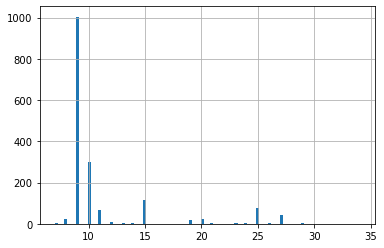

In [114]:
df_tc_pos['len'] = df_tc_pos['epitope_description'].apply(lambda x: len(x))
pos_uni= df_tc_pos.drop_duplicates('epitope_description')
pos_uni['len'].describe(), pos_uni['len'].hist(bins=100)

# prime data

In [2]:
df_prime = pd.read_excel('../data/PRIME_dataset.xlsx', engine = 'openpyxl', skiprows=2)
df_neg = df_prime.query('Immunogenicity==0')

count    6476.000000
mean        9.332149
std         0.604558
min         8.000000
25%         9.000000
50%         9.000000
75%        10.000000
max        12.000000
Name: len, dtype: float64

,Mutant,Allele,MixMHCpred,NetMHCpanEL,NetMHCpanBA,NetMHCpanBA_Kd,NetMHCstabpan,NetMHCstabpan_T12,MHCflurry,HLAthena,NetChop,TAP,IEDB,Foreignness,WT_peptide,NetMHCpanEL_WT,NetMHCpanBA_Kd_WT,ratio_%rank,ratio_Kd,DisToSelf,DisToSelf_peptide,Immunogenicity,StudyOrigin,PRIME
len,,,,,,,,,,,,,,,,,,,,,,,,
8,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
9,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675,1399,1399,1399,1399,1399,4675,4675,4675,4675,4675
10,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
11,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424
12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


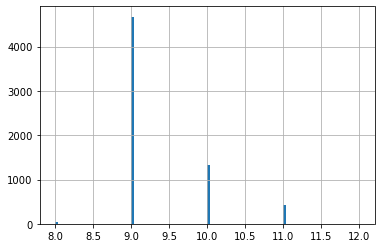

In [13]:
df_neg['len']=df_neg['Mutant'].apply(lambda x:len(x))
df_neg['len'].hist(bins=100)
display(df_neg['len'].describe())
display(df_neg.groupby('len').count())

count    3919.000000
mean       10.698903
std         4.143813
min         7.000000
25%         9.000000
50%         9.000000
75%        10.000000
max        34.000000
Name: len, dtype: float64

,reference_t cell id,reference_reference id,reference_type,reference_pubmed id,reference_authors,reference_journal,reference_date,reference_title,reference_submission id,epitope_epitope id,epitope_object type,epitope_description,epitope_starting position,epitope_ending position,epitope_non-peptidic epitope chebi id,epitope_antigen name,epitope_parent protein,epitope_parent protein accession,epitope_organism name,epitope_parent species,epitope_parent species id,epitope_epitope comments,related object_epitope relationship,related object_object type,related object_description,related object_starting position,related object_ending position,related object_non-peptidic object accession,related object_synonyms,related object_antigen name,related object_parent protein,related object_organism name,related object_parent organism,host_name,host_host id,host_geolocation,host_mhc types present,1st in vivo process_process type,1st in vivo process_disease state,1st in vivo process_disease stage,1st in vivo process_immunogen epitope relation,1st in vivo process_immunogen object type,1st in vivo process_immunogen description,1st in vivo process_immunogen starting position,1st in vivo process_immunogen ending position,1st in vivo process_non-peptidic immunogen chebi id,1st in vivo process_immunogen source molecule name,1st in vivo process_immunogen protein parent name,1st in vivo process_immunogen protein parent accession,1st in vivo process_immunogen organism name,1st in vivo process_immunogen organism species,1st in vivo process_immunogen organism species accession,2nd in vivo process_process type,2nd in vivo process_disease state,2nd in vivo process_disease stage,2nd in vivo process_immunogen epitope relation,2nd in vivo process_immunogen object type,2nd in vivo process_immunogen description,2nd in vivo process_immunogen starting position,2nd in vivo process_immunogen ending position,2nd in vivo process_non-peptidic immunogen chebi id,2nd in vivo process_immunogen source molecule name,2nd in vivo process_immunogen protein parent name,2nd in vivo process_immunogen protein parent accession,2nd in vivo process_immunogen organism name,2nd in vivo process_immunogen organism species,2nd in vivo process_immunogen organism species accession,in vitro process_in vitro process type,in vitro process_responder cell type,in vitro process_stimulator cell type,in vitro process_immunogen epitope relation,in vitro process_immunogen object type,in vitro process_immunogen description,in vitro process_non-peptidic immunogen chebi id,in vitro process_immunogen source molecule name,in vitro process_protein parent name,in vitro process_protein parent accession,in vitro process_immunogen organism name,in vitro process_immunogen organism species,in vitro process_immunogen organism species id,adoptive transfer_adoptive transfer flag,adoptive transfer_adoptive transfer comments,immunization comments_immunization comments,assay_location of assay data in the manuscript,assay_method/technique,assay_assay group,assay_units,assay_qualitative measure,assay_measurement inequality,assay_quantitative measurement,assay_number of subjects tested,assay_number of subjects responded,assay_response frequency,effector cells_cell tissue type,effector cells_cell type,effector cells_cell culture conditions,tcr_assayed tcr molecule name,tcr_pdb id,antigen presenting cells_cell tissue type,antigen presenting cells_cell type,antigen presenting cells_cell culture conditions,mhc_allele name,mhc_class,mhc_allele evidence code,assay antigen_antigen epitope relation,assay antigen_antigen object type,assay antigen_antigen description,assay antigen_starting position,assay antigen_ending position,assay antigen_non-peptidic antigen chebi id,assay antigen_antigen source molecule name,assay antigen_protein parent name,assay antigen_protein parent accession,assay antigen_antigen organism name,assay antigen_organism species name,assay antigen_organism species id,assay comments_assay comments
len,,,,,,,,

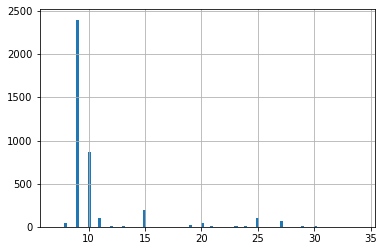

In [15]:
df_tc_pos['len']=df_tc_pos['epitope_description'].apply(lambda x:len(x))
df_tc_pos['len'].hist(bins=100)
display(df_tc_pos['len'].describe())
display(df_tc_pos.groupby('len').count())

In [22]:
z = [x for x in df_tc_pos['mhc_allele name'].unique() if '*' not in x]
df_tc_pos

count    763.000000
mean      13.892529
std        6.510963
min        7.000000
25%        9.000000
50%       10.000000
75%       15.000000
max       34.000000
Name: len, dtype: float64

In [28]:
df_tc_pos['mhc_allele name'].unique()

array(['HLA-A2', 'HLA-A*02:01', 'HLA-A*24:02', 'HLA-A1', 'HLA-A3',
       'HLA-C*05:01', 'HLA class I', 'HLA-A*03:01', 'HLA-B*44:03',
       'HLA-B*44:02', 'HLA-B*15:01', 'HLA-B*35:01', 'HLA-B7', 'HLA-B8',
       'HLA-B*07:02', 'HLA-A*11:01', 'HLA-B*38:01', 'HLA-C*14:02',
       'HLA-B*51:01', 'HLA-B35', 'HLA-Cw3', 'HLA-B*08:01', 'HLA-A*30:01',
       'HLA-A*01:01', 'HLA-A*02:06', 'HLA-B*27:05', 'HLA-C*03:03',
       'HLA-C*07:02', 'HLA-A*02:11', 'HLA-C*06:02', 'HLA-A*02:03',
       'HLA-B*40:01', 'HLA-B*18:01', 'HLA-C*07:01', 'HLA-A*25:01',
       'HLA-A11', 'HLA-A*80:01', 'HLA-C*14:03', 'HLA-B*39:01',
       'HLA-C*04:01', 'HLA-B*35:03', 'HLA-C*01:02', 'HLA-A*68:02',
       'HLA-A*68:01', 'HLA-A*31:01', 'HLA-C*08:02', 'HLA-A*29:02',
       'HLA-A*30:02', 'HLA-B*15:03', 'HLA-B*53:01', 'HLA-B*44:08',
       'HLA-C*15:02', 'HLA-B*40:02', 'HLA-A*26:01', 'HLA-A*02:10',
       'HLA-A*02:05', 'HLA-B*57:01', 'HLA-C*03:04', 'HLA-A*11:02',
       'HLA-A*03:02', 'HLA-B*27:04', 'HLA-B*15:02', 'H

In [51]:
full_reso = [x for x in df_tc_pos['mhc_allele name'].unique() if '*' in x]
part_reso = [x for x in df_tc_pos['mhc_allele name'].unique() if x not in full_reso]
lens = range(7,16)
for L in lens:
    lneg = len(df_neg.query("len==@L"))
    fres=len(df_tc_pos.query("`mhc_allele name` in @full_reso and len == @L"))
    if fres<5:
        continue
    print(f'\nfor length L: {L}')
    print(f'\tfull reso: {fres}')
    print(f'\tpart reso: {len(df_tc_pos.query("`mhc_allele name` in @part_reso and len == @L"))}')
    print(f'\tneg:\t   {lneg}')
    if lneg>0:
        print(f'pos-to-neg ratio:  {len(df_tc_pos.query("`mhc_allele name` in @full_reso and len == @L"))/len(df_neg.query("len==@L")):.2%}')


for length L: 8
	full reso: 34
	part reso: 9
	neg:	   38
pos-to-neg ratio:  89.47%

for length L: 9
	full reso: 2139
	part reso: 261
	neg:	   4675
pos-to-neg ratio:  45.75%

for length L: 10
	full reso: 695
	part reso: 177
	neg:	   1338
pos-to-neg ratio:  51.94%

for length L: 11
	full reso: 99
	part reso: 4
	neg:	   424
pos-to-neg ratio:  23.35%

for length L: 12
	full reso: 7
	part reso: 3
	neg:	   1
pos-to-neg ratio:  700.00%

for length L: 13
	full reso: 5
	part reso: 2
	neg:	   0

for length L: 15
	full reso: 52
	part reso: 137
	neg:	   0


In [24]:
df_neg['Allele'].unique()

array(['A0201', 'B4001', 'C0304', 'A6801', 'B1501', 'A3201', 'B4402',
       'B5101', 'A3101', 'A0301', 'B3801', 'C0602', 'A2301', 'B1402',
       'B4403', 'C0401', 'C0702', 'B3501', 'A2501', 'B0702', 'B0801',
       'C1601', 'A0101', 'A2402', 'A6901', 'C0303', 'A1101', 'B4501',
       'A0206', 'B5801', 'A2601', 'B1801', 'C0701', 'B1517', 'A0211',
       'C1502', 'B2705', 'A3301', 'C0802', 'B3503', 'A6812', 'C1203',
       'C0501', 'C1403', 'B3901', 'A3001', 'B5601', 'B2702', 'B4102',
       'A6601', 'A0103', 'C0102', 'C0202', 'B4901', 'A2902', 'A6802',
       'A0203', 'B5701', 'A3002', 'B1502', 'B3701', 'B3906', 'B4002',
       'B4101', 'B5301', 'C1402'], dtype=object)

In [54]:
len(df_tc_pos.query('`mhc_allele name` == "HLA-A*02:01"'))

2161

In [56]:
'HLA-A'.replace('B','')

'HLA-A'